## Exercise 13: Implement an Oracle for Deutsch’s Algorithm
1. Implement an oracle for a balanced function f(x), such as f(x) = x, where the result is 1 if x = 1, and 0 if x = 0.

2. Design the quantum circuit for Deutsch’s Algorithm using Qiskit and use your oracle to determine if the function is constant or balanced.

Expected Outcome: (a) If the oracle represents a balanced function, the result will be |1⟩, (b) If the oracle represents a constant function, the result will be |0⟩.

[Hints:] Use a single Hadamard gate to create superposition on the input qubit. The oracle can be designed using CNOT gates with the second qubit as the target. Measure the first qubit to determine if the function is constant or balanced.

In [35]:
from qiskit import *
from qiskit.primitives import StatevectorSampler  # simulator
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from numpy import sqrt
from qiskit.primitives import Sampler
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [36]:
def deutsch_function(case: int):
    
    if case not in [1, 2, 3, 4]:
        raise ValueError("`case` must be 1, 2, 3, or 4.")

    f = QuantumCircuit(2) 
    if case in [2, 3]:
        f.cx(0, 1)
    if case in [3, 4]:
        f.x(1)
    return f

In [41]:
def compile_circuit(function: QuantumCircuit):
   
    n = function.num_qubits - 1
    qc = QuantumCircuit(n + 1, n)

    qc.x(n)
    qc.h(range(n + 1))

    qc.barrier()
    qc.compose(function, inplace=True)
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

In [65]:
from qiskit_aer import AerSimulator

def deutsch_algorithm(function: QuantumCircuit):
    
    qc = compile_circuit(function)

    result = AerSimulator().run(qc, shots=1, memory=True).result()
    measurements = result.get_memory()
    if measurements[0] == "0":
        return "constant", measurements[0]
    return "balanced", measurements[0]

Measurement of first qubit : 0
The function is : constant
Circuit: 


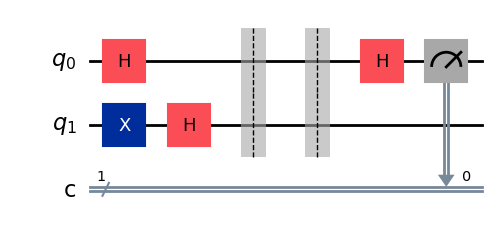

In [70]:
f1 = deutsch_function(1)
result1, measurement1 = deutsch_algorithm(f1)
print(f"Measurement of first qubit : {measurement1}")
print(f"The function is : {result1}")
print(f"Circuit: ")
compile_circuit(f1).draw('mpl')

Measurement of first qubit : 1
The function is : balanced
Circuit: 


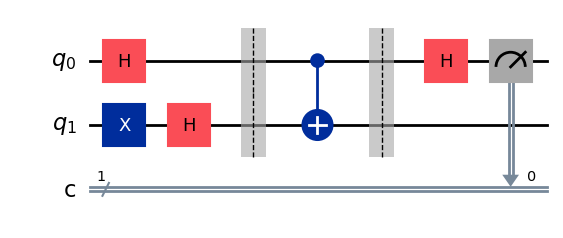

In [71]:
f2 = deutsch_function(2)
result2, measurement2 = deutsch_algorithm(f2)
print(f"Measurement of first qubit : {measurement2}")
print(f"The function is : {result2}")
print(f"Circuit: ")
compile_circuit(f2).draw('mpl')

Measurement of first qubit : 1
The function is : balanced
Circuit: 


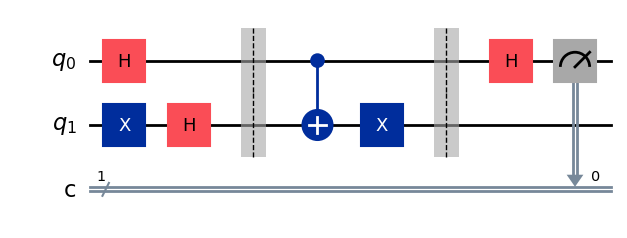

In [72]:
f3 = deutsch_function(3)
result3, measurement3 = deutsch_algorithm(f3)
print(f"Measurement of first qubit : {measurement3}")
print(f"The function is : {result3}")
print(f"Circuit: ")
compile_circuit(f3).draw('mpl')

Measurement of first qubit : 0
The function is : constant
Circuit: 


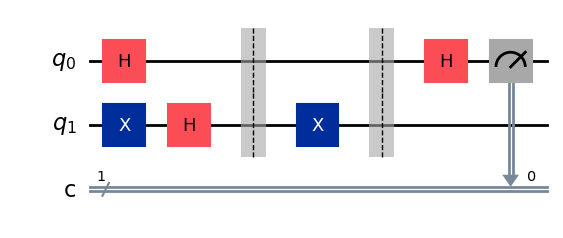

In [73]:
f4 = deutsch_function(4)
result4, measurement4 = deutsch_algorithm(f4)
print(f"Measurement of first qubit : {measurement4}")
print(f"The function is : {result4}")
print(f"Circuit: ")
compile_circuit(f4).draw('mpl')